In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
import plotly
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime

In [3]:
df_taetfp = pd.read_csv("data/taetfp.csv", encoding = "big5")
df_taetfp["中文簡稱"] = df_taetfp["中文簡稱"].map(lambda x: x.strip())
df_taetfp["日期"] = df_taetfp["日期"].map(lambda x: datetime.datetime.strptime(str(x),"%Y%m%d"))

In [14]:
r = lambda: random.randint(0,255)
traces = []

for etf_name in df_taetfp["中文簡稱"].unique():
    inner_df = df_taetfp[df_taetfp["中文簡稱"] == etf_name]
    clr = str(r()) + str(r()) + str(r())
#     df = df.sample(n=100, replace=True)
    inner_df = inner_df.sort_values('日期')
#     print(df['Label'])
    label = etf_name

    trace = plotly.graph_objs.Scattergl(
        x=inner_df['日期'],
        y=inner_df['收盤價(元)'],
        mode='line',
        line=dict(
            color = clr
        )
    )
    traces.append(trace)

In [15]:

layout = plotly.graph_objs.Layout(
    title='Plot',
)
fig = plotly.graph_objs.Figure(data=traces, layout=layout)

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='dataplot')

In [5]:
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import matplotlib
import matplotlib.pyplot as plt

In [45]:
test_df = pd.DataFrame({
    "time": [0,1,2,3,4,0,1,2,3,4],
    "class":["A","A","A","A","A","B","B","B","B","B",],
    "subject":[0,1,2,3,4,0,1,2,3,4],
    "value":[5,4,3,2,1,1,2,3,4,5]
})

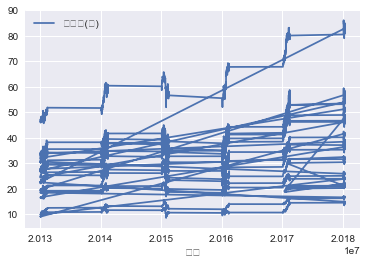

In [52]:
df_taetfp.plot(x="日期", y="收盤價(元)")

In [56]:
rng = np.random.RandomState(0)

x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [106]:
ts = pd.Series(df_taetfp[df_taetfp["中文簡稱"] == "元大台灣50"]["收盤價(元)"], index=df_taetfp[df_taetfp["中文簡稱"] == "元大台灣50"]["日期"])

In [100]:
ddf = df_taetfp[df_taetfp["中文簡稱"] == "元大台灣50"]

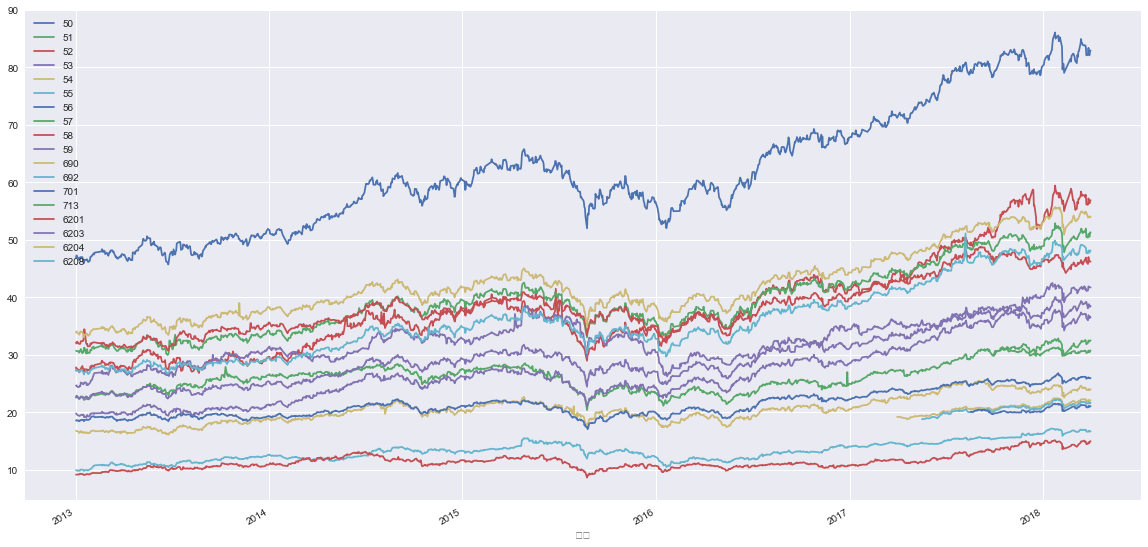

In [13]:
#matplotlib.rc('font', family='Arial')
fig, ax = plt.subplots(figsize=(20,10))
for key, grp in df_taetfp.groupby(['代碼']):
    ax = grp.plot(ax=ax, kind='line', x='日期', y='收盤價(元)', label=key)

plt.legend(loc='best')
plt.show()